# **QUESTION ONE**

The dataset provided shows the annual salary information of an organisation for employees paid in calendar year 2023. This dataset is a prime candidate for conducting analyses on salary disparities, the distribution of salaries across gender and grade levels, and other business intelligence aspects.

1. **Gender Pay Gap Analysis**: Using suitable visuals, run a “Gender Pay Gap Analysis” to examine the salary differences between genders within similar ‘Divisions’, ‘Grades’ and ‘Departments’ to identify any disparities that need to be addressed in the organisation. [20 Marks]

2. **Distribution of Salaries**: Analyse the distribution of salaries across different ‘Departments’ and ‘Divisions’ to understand how compensation varies within the organisation. [10 Marks]

3. **Impact of Overtime and Longevity Pay**: Identify the impact of ‘Overtime’ and ‘Longevity Pay’ on the overall compensation of employees (i.e. ‘Base_Salary’) and explain the trends or patterns in these payments. [10 Marks]


In [79]:
# import dataset
import pandas as pd #import and transform-data import seaborn as sn #Generates visuals
import seaborn as sn
import numpy as np #structuring data
import matplotlib as mat #Generates visuals
data2 = pd.read_csv('Question1.csv')

In [80]:
data2

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16
...,...,...,...,...,...,...,...,...
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,0.00,N28
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.00,0.00,NaN
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.00,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.00,1596.27,N21


In [81]:
data2.duplicated().sum()

617

In [82]:
data1=data2.drop_duplicates()
data1.duplicated().sum()

0

In [83]:
data1.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              25
dtype: int64

In [84]:
data= data1.fillna(method='backfill')

C:\Users\seth\AppData\Local\Temp\ipykernel_32752\3393600526.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data= data1.fillna(method='backfill')


In [86]:
#drop missing values
#data = data1.dropna()
data.isnull().sum()

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

In [87]:
data.nunique()

Department           42
Department_Name      42
Division            627
Gender                2
Base_Salary        3470
Overtime_Pay       5566
Longevity_Pay      1113
Grade                98
dtype: int64

In [88]:
data.describe()

,Base_Salary,Overtime_Pay,Longevity_Pay
count,9674.000000,9674.000000,9674.000000
mean,90725.643578,8594.192753,1573.027926
std,30774.245561,16879.186881,3256.385047
min,11147.240000,0.000000,0.000000
25%,71147.363700,0.000000,0.000000
50%,87328.000000,518.325000,0.000000
75%,108084.000000,10237.242500,1334.992500
max,292000.000000,227428.990000,20279.460000


In [89]:
# Calculate descriptive statistics
desc = data.describe()

# Calculate mode
mode = data.mode().iloc[0]

# Add mode to the descriptive statistics
desc.loc['mode'] = mode

print(desc)

         Base_Salary   Overtime_Pay  Longevity_Pay
count    9674.000000    9674.000000    9674.000000
mean    90725.643578    8594.192753    1573.027926
std     30774.245561   16879.186881    3256.385047
min     11147.240000       0.000000       0.000000
25%     71147.363700       0.000000       0.000000
50%     87328.000000     518.325000       0.000000
75%    108084.000000   10237.242500    1334.992500
max    292000.000000  227428.990000   20279.460000
mode   108084.000000       0.000000       0.000000


In [90]:
# Calculate the mode for each column
mode_values = data.mode().iloc[0]

# Initialize a dictionary to store the count of mode occurrences
mode_counts = {}

# Iterate through each column and count the occurrences of the mode value
for column in data.columns:
    mode_counts[column] = data[column].value_counts().get(mode_values[column], 0)

print(mode_counts)

{'Department': 1702, 'Department_Name': 1702, 'Division': 352, 'Gender': 5687, 'Base_Salary': 372, 'Overtime_Pay': 4065, 'Longevity_Pay': 6950, 'Grade': 686}


In [91]:
unique_base_salaries = data['Base_Salary'].nunique()
print(unique_base_salaries)

3470


In [92]:
data.dtypes

Department          object
Department_Name     object
Division            object
Gender              object
Base_Salary        float64
Overtime_Pay       float64
Longevity_Pay      float64
Grade               object
dtype: object



### Standard Deviation Interpretation

#### Base_Salary
- **Standard Deviation (std)**: 30,463.74
- **Interpretation**: The base salaries in your dataset typically vary by about $30,463.74 from the mean salary of $90,530.12. This indicates a moderate level of dispersion around the mean. A higher standard deviation would indicate more variability in salaries, while a lower standard deviation would indicate that salaries are more closely clustered around the mean.

#### Overtime_Pay
- **Standard Deviation (std)**: 16,895.36
- **Interpretation**: The overtime pay in your dataset typically varies by about $16,895.36 from the mean overtime pay of $8,616.46. This high standard deviation suggests significant variability in overtime pay, with some employees receiving much higher or lower overtime pay than the average.

#### Longevity_Pay
- **Standard Deviation (std)**: 3,259.65
- **Interpretation**: The longevity pay in your dataset typically varies by about $3,259.65 from the mean longevity pay of $1,577.01. This indicates a high level of dispersion, with some employees receiving much higher or lower longevity pay than the average.

### Variation and Dispersion
- **Variation**: Standard deviation measures the extent to which the values in a dataset vary from the mean. A higher standard deviation indicates greater variation, while a lower standard deviation indicates less variation.
- **Dispersion**: Standard deviation quantifies the spread of the data points around the mean. It helps understand how spread out the values are in the dataset.

### Outliers
- **Outliers**: Data points that are significantly higher or lower than the rest of the data can increase the standard deviation. For example, the maximum values in your dataset (e.g., $292,000 for Base_Salary, $227,428.99 for Overtime_Pay, and $20,279.46 for Longevity_Pay) suggest the presence of outliers, which contribute to the high standard deviation.

### Summary
- **Base_Salary**: The standard deviation of $30,463.74 indicates moderate variability in salaries.
- **Overtime_Pay**: The standard deviation of $16,895.36 indicates significant variability in overtime pay.
- **Longevity_Pay**: The standard deviation of $3,259.65 indicates high variability in longevity pay.

The standard deviation provides valuable insights into the variability and dispersion of the data in each column. It helps identify the presence of outliers and understand how spread out the values are around the mean.

### Interpretation

- **Base_Salary**: The average base salary is approximately $90,530, with a standard deviation of $30,464. The salaries range from $18,257.50 to $292,000. The median salary is $87,328.
- **Overtime_Pay**: The average overtime pay is approximately $8,616, with a standard deviation of $16,895. The overtime pay ranges from $0 to $227,428.99. The median overtime pay is $526.71, indicating that many employees may not receive overtime pay.
- **Longevity_Pay**: The average longevity pay is approximately $1,577, with a standard deviation of $3,260. The longevity pay ranges from $0 to $20,279.46. The median longevity pay is $0, indicating that many employees may not receive longevity pay.

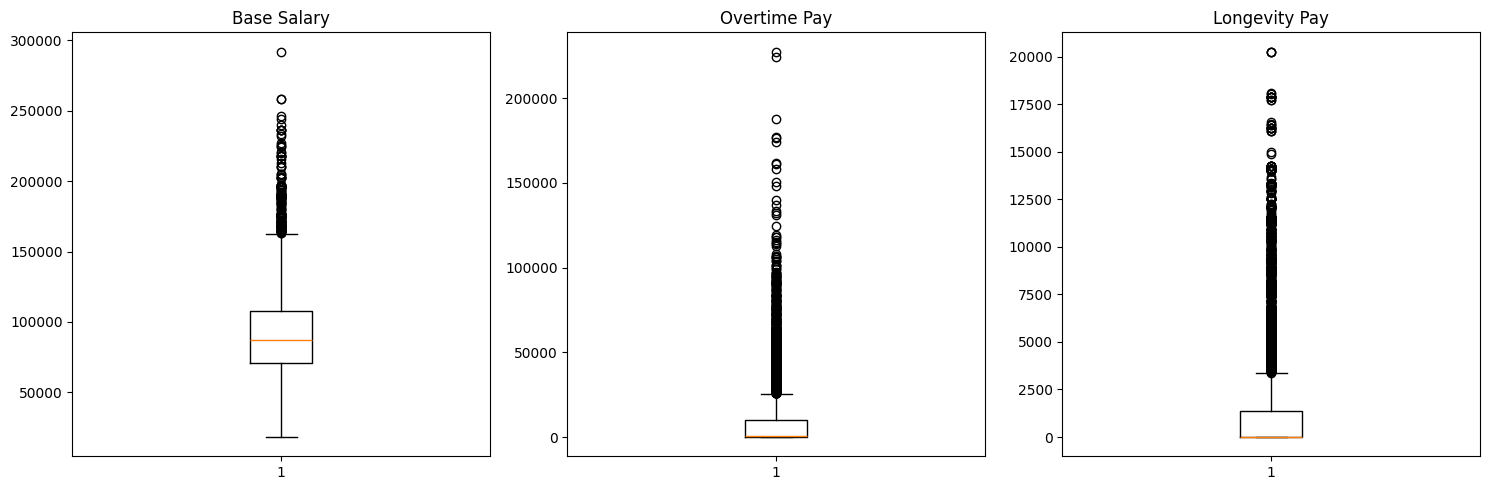

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns to check for outliers
plt.figure(figsize=(15, 5))

# Box plot for Base_Salary
plt.subplot(1, 3, 1)
plt.boxplot(data['Base_Salary'])
plt.title('Base Salary')

# Box plot for Overtime_Pay
plt.subplot(1, 3, 2)
plt.boxplot(data['Overtime_Pay'])
plt.title('Overtime Pay')

# Box plot for Longevity_Pay
plt.subplot(1, 3, 3)
plt.boxplot(data['Longevity_Pay'])
plt.title('Longevity Pay')

plt.tight_layout()
plt.show()

In [93]:


def count_outliers(data, column_name):
    """
    Calculates the number of outliers in a specified column of a pandas DataFrame 
    using the IQR method.

    Args:
        data: The pandas DataFrame.
        column_name: The name of the column to check for outliers.

    Returns:
        The number of outliers in the column.
    """
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return len(outliers)

# Count outliers in each column
base_salary_outliers = count_outliers(data, 'Base_Salary')
overtime_pay_outliers = count_outliers(data, 'Overtime_Pay')
longevity_pay_outliers = count_outliers(data, 'Longevity_Pay')

print("Number of Base_Salary outliers:", base_salary_outliers)
print("Number of Overtime_Pay outliers:", overtime_pay_outliers)
print("Number of Longevity_Pay outliers:", longevity_pay_outliers)

# Calculate the total number of outliers across all three columns
total_outliers = base_salary_outliers + overtime_pay_outliers + longevity_pay_outliers
print("Total number of outliers:", total_outliers)


Number of Base_Salary outliers: 253
Number of Overtime_Pay outliers: 1049
Number of Longevity_Pay outliers: 1820
Total number of outliers: 3122


In [106]:
def count_outliers(df):
    numeric_df = df.select_dtypes(include=[np.number])
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
    return outliers

count_outliers(data)

Base_Salary       253
Overtime_Pay     1049
Longevity_Pay    1820
z_score           253
dtype: int64

In [96]:
# Calculate the percentage of outliers
outlier_percentage = (total_outliers / len(data)) * 100

# Check if the outliers are more than 30% of the data
if outlier_percentage > 30:
    print("Outliers are more than 30% of the data.")
else:
    print("Outliers are not more than 30% of the data.")

print(f"Outlier percentage: {outlier_percentage:.2f}%")

Outliers are more than 30% of the data.
Outlier percentage: 32.27%


Use z-score to remove outliers and keep some. 

In [107]:
from scipy import stats

data["z_score"] = stats.zscore(data[column])
threshold = 2

# Calculate z-scores for all continuous columns

data
filtered_data = data[np.abs(data['z_score']) <= threshold]
filtered_data


,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,z_score
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3,1.783652
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3,1.502774
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21,-0.042016
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16,-0.382763
5,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,98228.0000,518.80,998.28,21,0.243799
...,...,...,...,...,...,...,...,...,...
10282,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,2185.69,N28,1.422508
10283,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,F,134500.0000,0.00,2185.69,N28,1.422508
10284,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,0.00,N28,1.422508
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.00,0.00,N18,-0.206680


In [114]:
# Identify variables by their data types
cat = []
cont = []

for column in data.columns:
    if data[column].dtype == object or len(data[column].unique()) <= 7:
        cat.append(column)
    else:
        if column != 'z_score':
            cont.append(column)

# Display the categorization
print("Categorical Columns:")
print(cat)
print("\nContinuous Columns:")
print(cont)

Categorical Columns:
['Department', 'Department_Name', 'Division', 'Gender', 'Grade']

Continuous Columns:
['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']


C:\Users\seth\AppData\Local\Temp\ipykernel_32752\1875540404.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


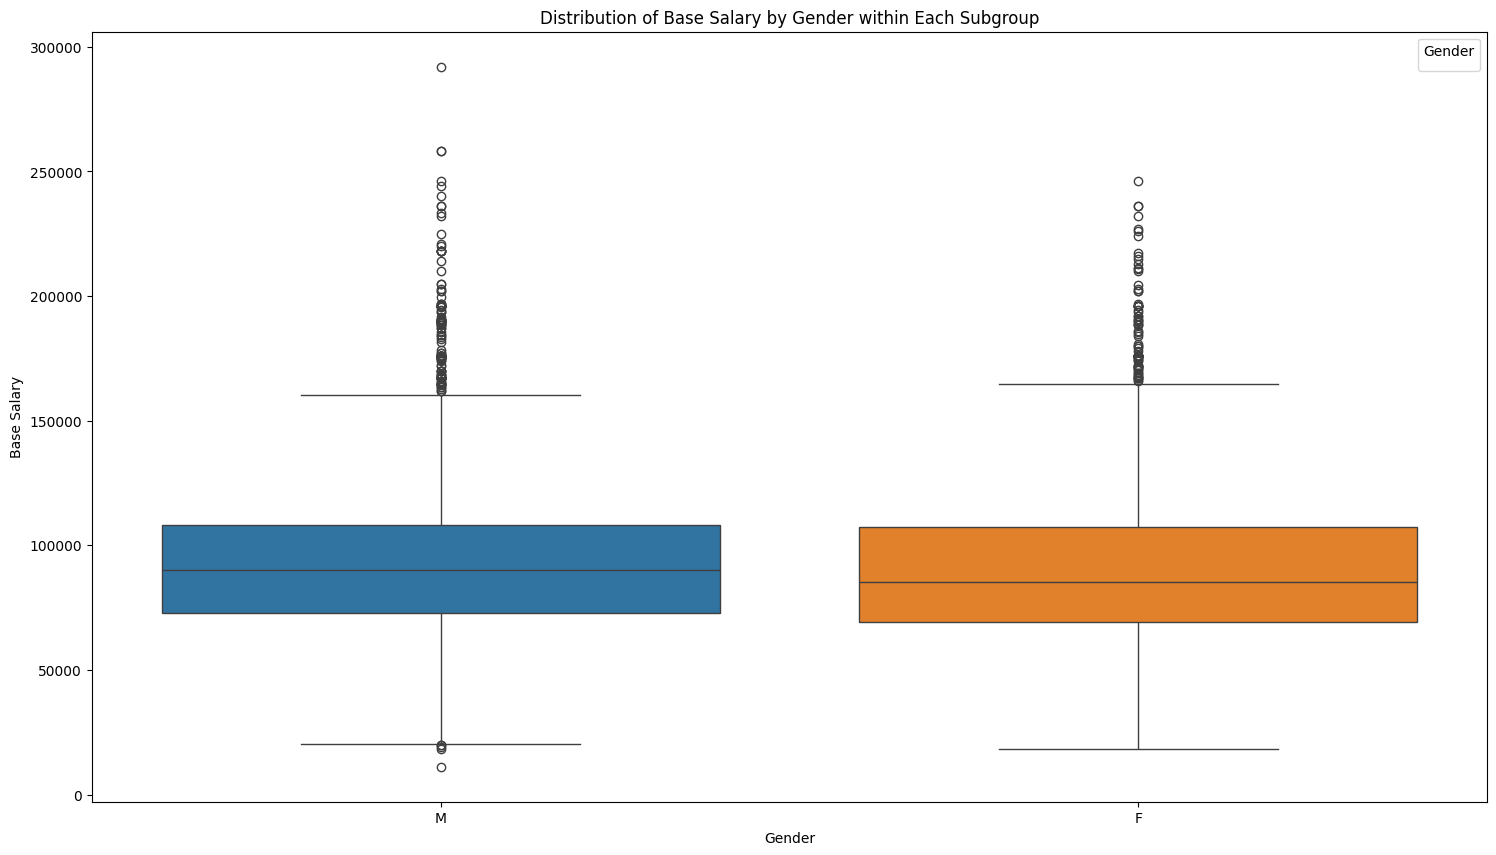

C:\Users\seth\AppData\Local\Temp\ipykernel_32752\1875540404.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


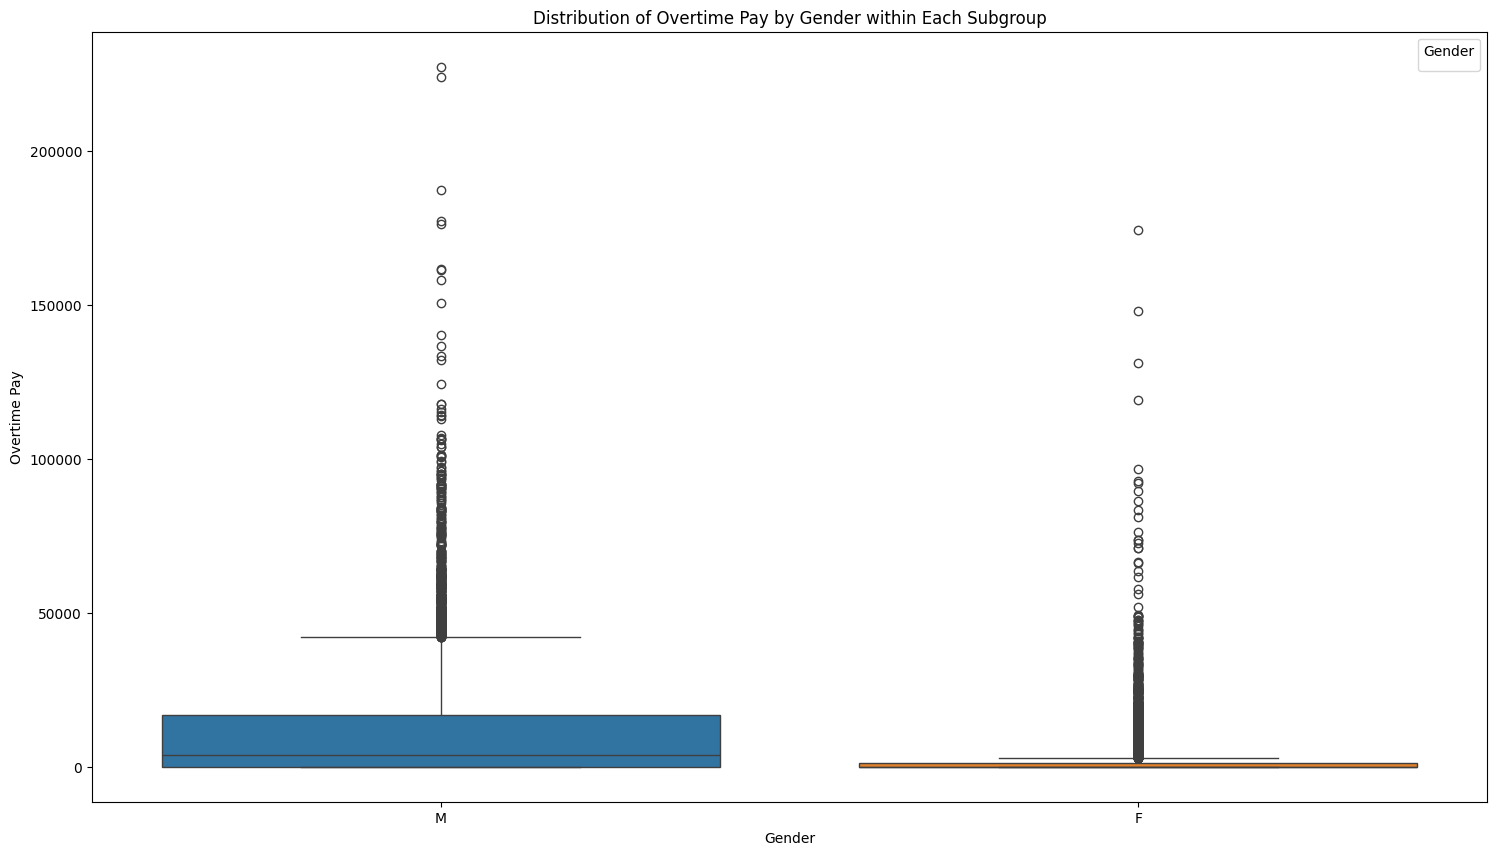

C:\Users\seth\AppData\Local\Temp\ipykernel_32752\1875540404.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title='Gender')
C:\Users\seth\AppData\Local\Temp\ipykernel_32752\1875540404.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title='Gender')
C:\Users\seth\AppData\Local\Temp\ipykernel_32752\1875540404.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend(title='Gender')


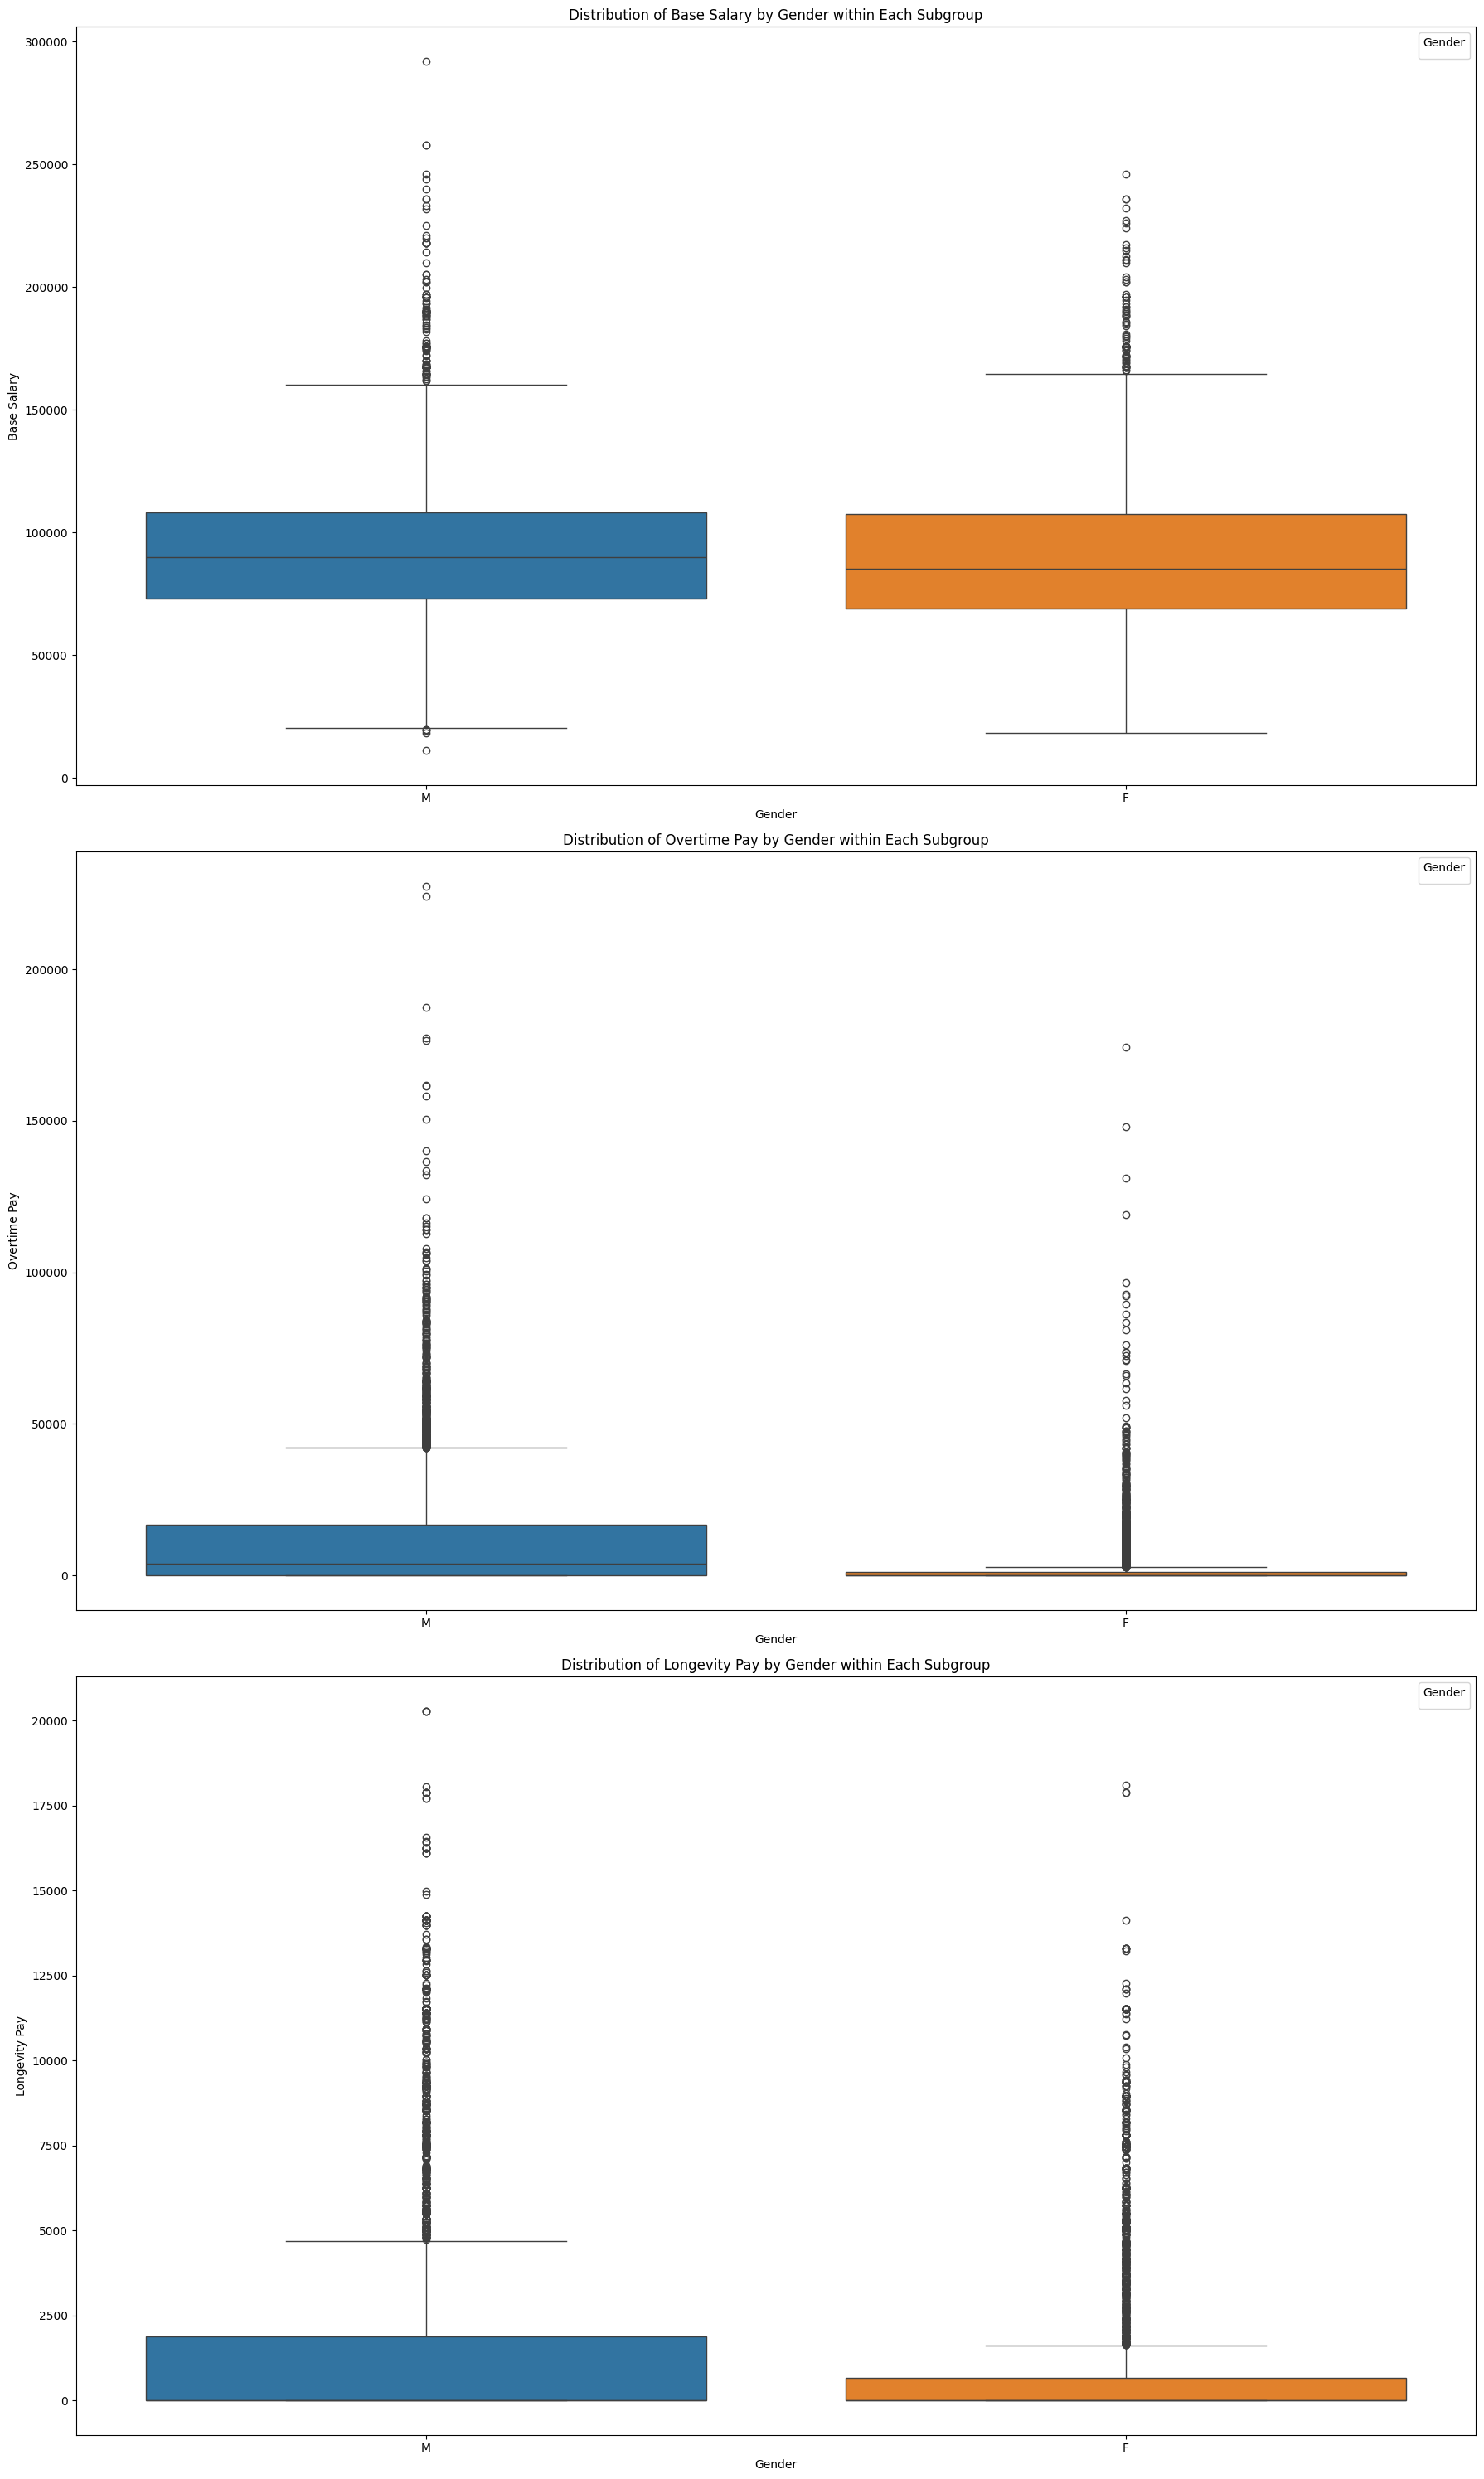

In [ ]:
# Visualize the distribution of salaries for each gender within each subgroup (division, grade, department)
plt.figure(figsize=(18, 10))
sns.boxplot(x='Gender', y='Base_Salary', hue='Gender', data=data)
plt.title('Distribution of Base Salary by Gender within Each Subgroup')
plt.xlabel('Gender')
plt.ylabel('Base Salary')
plt.legend(title='Gender')
plt.show()

# Visualize the distribution of Overtime_Pay for each gender
plt.figure(figsize=(18, 10))
sns.boxplot(x='Gender', y='Overtime_Pay', hue='Gender', data=data)
plt.title('Distribution of Overtime Pay by Gender within Each Subgroup')
plt.xlabel('Gender')
plt.ylabel('Overtime Pay')
plt.legend(title='Gender')
plt.show()

# Visualize the distribution of Longevity_Pay for each gender
plt.figure(figsize=(18, 10))
sns.boxplot(x='Gender', y='Longevity_Pay', hue='Gender', data=data)
plt.title('Distribution of Longevity Pay by Gender within Each Subgroup')
plt.xlabel('Gender')
plt.ylabel('Longevity Pay')
plt.legend(title='Gender')
plt.show()